In [1]:
# Dropout(0.2) 드롭아웃
#        20% off

#       hidden1     hidden2
#       64=>32      32

# return_squencess = True

In [2]:
import pandas as pd
df = pd.read_csv('c:/workspace3/data/pollution.csv', index_col=0)
df

,pollution,dew,temp,pressure,w_dir,w_speed,snow,rain
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


<Axes: >

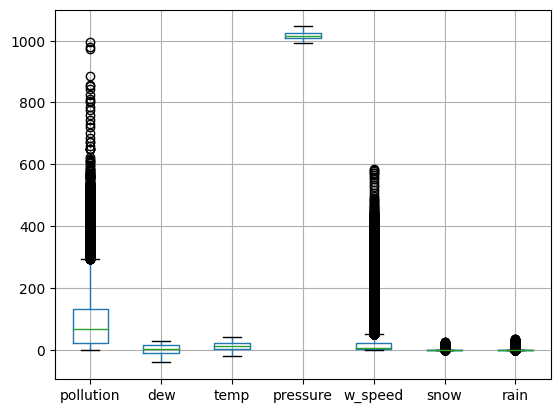

In [3]:
df.boxplot()

In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

values = df.values
encoder = LabelEncoder()

# w_dir 변수 정수인코딩(SE,NW,NE,cv => 0,1,2,3)
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')

np.unique(values[:,4])

array([0., 1., 2., 3.], dtype=float32)

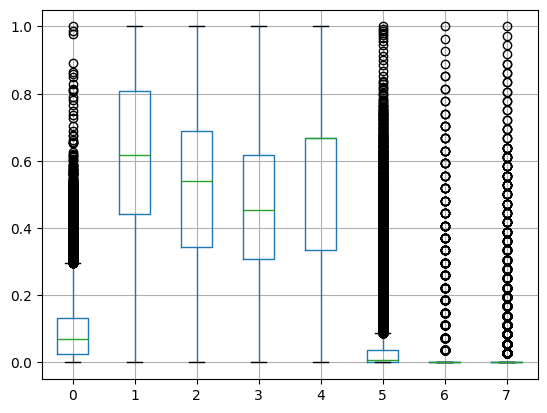

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

pd.DataFrame(scaled).boxplot()

plt.show()

In [6]:
#쉬프트
def shift(train):
  timestep = 4

  X = []
  y = []

  for i in range(timestep, len(train)):
    X.append(train[i-timestep:i,:]) # pollution ~ rain
    y.append(train[i,0:1]) # pollution

  return X,y

In [18]:
print(X)
print(y)

[[[0.12977867 0.35294122 0.24590163 ... 0.00229001 0.         0.        ]
  [0.14889336 0.36764708 0.24590163 ... 0.00381099 0.         0.        ]
  [0.15995975 0.4264706  0.22950819 ... 0.00533197 0.         0.        ]
  [0.18209255 0.48529413 0.22950819 ... 0.00839101 0.03703704 0.        ]]

 [[0.14889336 0.36764708 0.24590163 ... 0.00381099 0.         0.        ]
  [0.15995975 0.4264706  0.22950819 ... 0.00533197 0.         0.        ]
  [0.18209255 0.48529413 0.22950819 ... 0.00839101 0.03703704 0.        ]
  [0.13883299 0.48529413 0.22950819 ... 0.00991199 0.07407407 0.        ]]

 [[0.15995975 0.4264706  0.22950819 ... 0.00533197 0.         0.        ]
  [0.18209255 0.48529413 0.22950819 ... 0.00839101 0.03703704 0.        ]
  [0.13883299 0.48529413 0.22950819 ... 0.00991199 0.07407407 0.        ]
  [0.10965794 0.48529413 0.21311474 ... 0.01143297 0.11111111 0.        ]]

 ...

 [[0.00905433 0.2647059  0.29508194 ... 0.3773221  0.         0.        ]
  [0.01006036 0.2647059  0

In [7]:
X, y = shift(scaled)
X = np.array(X)
y = np.array(y)

print(X.shape)      # 샘플수, 타임스텝, 변수개수
print(y.shape)

(43796, 4, 8)
(43796, 1)


In [8]:
#학습용:검증용 8:2 (4년:1년)
n_train= int(len(X)*.2)+1
X_train, X_test = X[n_train:,] , X[:n_train,]
print(X_train.shape, X_test.shape)

y_train, y_test = y[n_train:,] , y[:n_train,]
print(y_train.shape)
print(y_test.shape)

(35036, 4, 8) (8760, 4, 8)
(35036, 1)
(8760, 1)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM

model = Sequential()

#return_sequences = False 기본값, 마지막 스텝만 내보내는 옵션
#return_sequences = True, 모든 스텝에 내보내는 옵션(LSTM을 여러층으로 만들 경우 사용)

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))     # 20% 신호 off

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))     # linear(회귀)

model.compile(optimizer = 'adam', loss = 'mse')    

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 50)             11800     
                                                                 
 dropout (Dropout)           (None, 4, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [10]:
import tensorflow as tf
with tf.device('/:GPU0'):
    model.fit(X_train, y_train, validation_split=0.2, epochs = 10, batch_size = 32)

Epoch 1/10
876/876 [==============================] - 12s 9ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 2/10
876/876 [==============================] - 8s 9ms/step - loss: 0.0013 - val_loss: 6.2312e-04
Epoch 3/10
876/876 [==============================] - 8s 9ms/step - loss: 0.0010 - val_loss: 5.2793e-04
Epoch 4/10
876/876 [==============================] - 8s 9ms/step - loss: 9.6085e-04 - val_loss: 5.2019e-04
Epoch 5/10
876/876 [==============================] - 7s 8ms/step - loss: 9.0772e-04 - val_loss: 5.4744e-04
Epoch 6/10
876/876 [==============================] - 7s 8ms/step - loss: 8.8879e-04 - val_loss: 5.2986e-04
Epoch 7/10
876/876 [==============================] - 7s 8ms/step - loss: 8.7414e-04 - val_loss: 5.4600e-04
Epoch 8/10
876/876 [==============================] - 7s 8ms/step - loss: 8.8370e-04 - val_loss: 5.0919e-04
Epoch 9/10
876/876 [==============================] - 8s 9ms/step - loss: 8.5805e-04 - val_loss: 7.7434e-04
Epoch 10/10
876/876 [======================

In [20]:
import tensorflow as tf
with tf.device('/:CPU0'):
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(rmse)

274/274 [==============================] - 1s 4ms/step
0.030668164


In [12]:
d = scaled[:n_train,:]
y_predicted = np.concatenate((pred,d[:n_train,1:]), axis =1)
y_tested = np.concatenate((y_test, d[:n_train,1:]), axis = 1)

In [13]:
y_predicted = scaler.inverse_transform(y_predicted)
y_tested = scaler.inverse_transform(y_tested)
y_predicted = y_predicted[:,0:1]
y_tested = y_tested[:,0:1]

In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_tested, y_predicted)
rmse = np.sqrt(mse)
rmse

30.484156

In [15]:
from sklearn.metrics import mean_squared_error  

mse = mean_squared_error(y_tested, y_predicted)  
print('RMSE' , np.sqrt(mse))

RMSE 30.484156


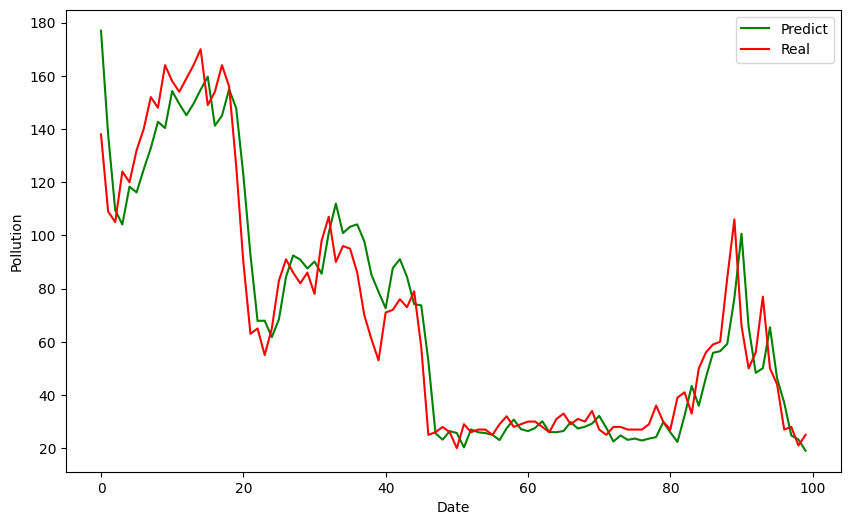

In [21]:
plt.figure(figsize=(10,6))  

plt.plot(y_predicted[:100,:], color= 'g',label = 'Predict')
plt.plot(y_tested[:100,:] , color = 'r',label = 'Real')

plt.xlabel("Date")
plt.ylabel("Pollution")

plt.legend()

plt.show()

